{'categories': [{'name': 'text_menu', 'score': 0.76171875}], 'color': {'dominantColorForeground': 'White', 'dominantColorBackground': 'White', 'dominantColors': ['White'], 'accentColor': '363636', 'isBwImg': True, 'isBWImg': True}, 'description': {'tags': ['text'], 'captions': [{'text': 'a close up of text on a white background', 'confidence': 0.8289184243349472}]}, 'requestId': '0d676d33-6512-4877-b7a8-7d4768fca3cd', 'metadata': {'width': 595, 'height': 842, 'format': 'Png'}}


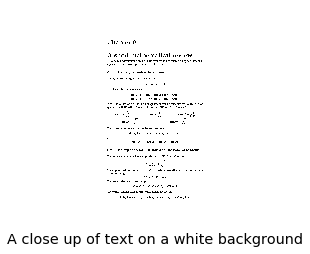

In [1]:
import requests
# If you are using a Jupyter notebook, uncomment the following line.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "7bd260c1c587409596a2d71b6bb31bc0"
assert subscription_key

# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westcentralus.api.cognitive.microsoft.com/vision/v2.0/"

analyze_url = vision_base_url + "analyze"

# Set image_path to the local path of an image that you want to analyze.
image_path = "../input_data/differential-equations/Pic-11.png"

# Read the image into a byte array
image_data = open(image_path, "rb").read()
headers = {
    'Ocp-Apim-Subscription-Key': subscription_key,
    'Content-Type': 'application/octet-stream'
}
params = {'visualFeatures': 'Categories,Description,Color'}
response = requests.post(
    analyze_url, headers=headers, params=params, data=image_data)
response.raise_for_status()

# The 'analysis' object contains various fields that describe the image. The most
# relevant caption for the image is obtained from the 'description' property.
analysis = response.json()
print(analysis)
image_caption = analysis["description"]["captions"][0]["text"].capitalize()

# Display the image and overlay it with the caption.
image = Image.open(BytesIO(image_data))
plt.imshow(image, interpolation='nearest', aspect='equal')

plt.axis("off")
_ = plt.title(image_caption, size="x-large", y=-0.1)